# Import Library

In [2]:
import numpy as np # powerfull package🔥, but we don't needs pandas in here 😂
import matplotlib.pyplot as plt # plot 📈

from sklearn.datasets import load_iris, load_diabetes, load_breast_cancer  # Mostly DS know about iris dataset 👀
from sklearn.model_selection import GridSearchCV, train_test_split # Model Selection
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.tree import DecisionTreeClassifier, plot_tree # Decision Tree
from sklearn.linear_model import LinearRegression # Regression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report # Metrics

import statsmodels.api as sm # unpopular package for better statistics models 

# Naive Bayes

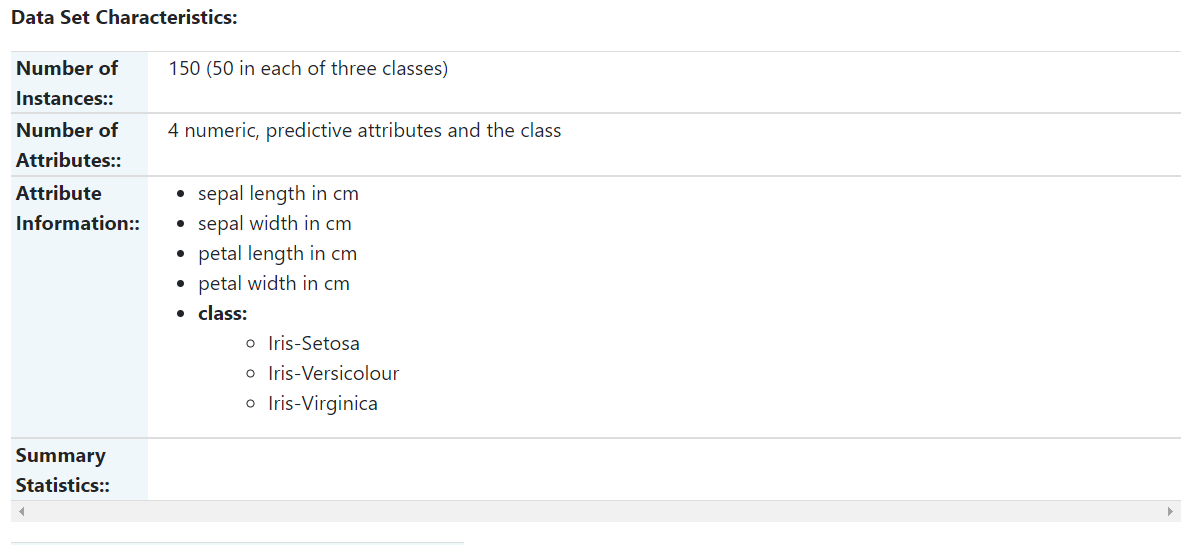

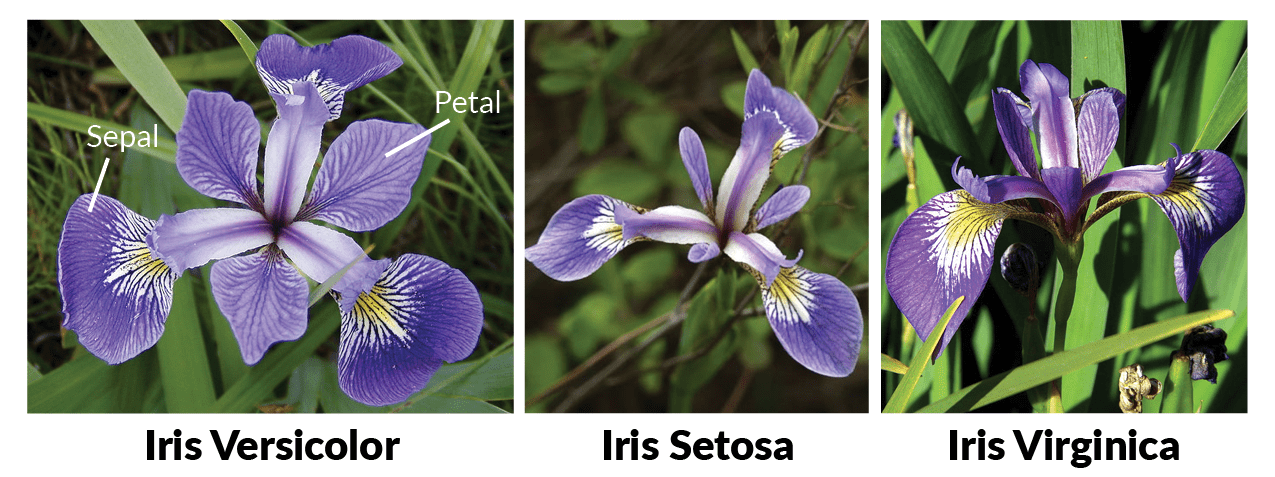

*   https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset
*   https://archive.ics.uci.edu/ml/datasets/iris


In [5]:
# Load Dataset
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Model Selection

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [7]:
# Confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

# Classification reports
print('')
print('Classification Report:\n',classification_report(y_test, y_pred))

Confusion Matrix:
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Decision Tree

In [12]:
# load the dataset and split it into training and testing sets
dataset = load_breast_cancer()

X = dataset.data
Y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

# train the model on train set without using GridSearchCV 
model = DecisionTreeClassifier() 
model.fit(X_train, y_train) 
   
# print prediction results 
predictions = model.predict(X_test)
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        66
           1       0.91      0.93      0.92       105

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [14]:
# defining parameter range 
param_grid = {'criterion': ['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

{'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        66
           1       0.97      0.94      0.96       105

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



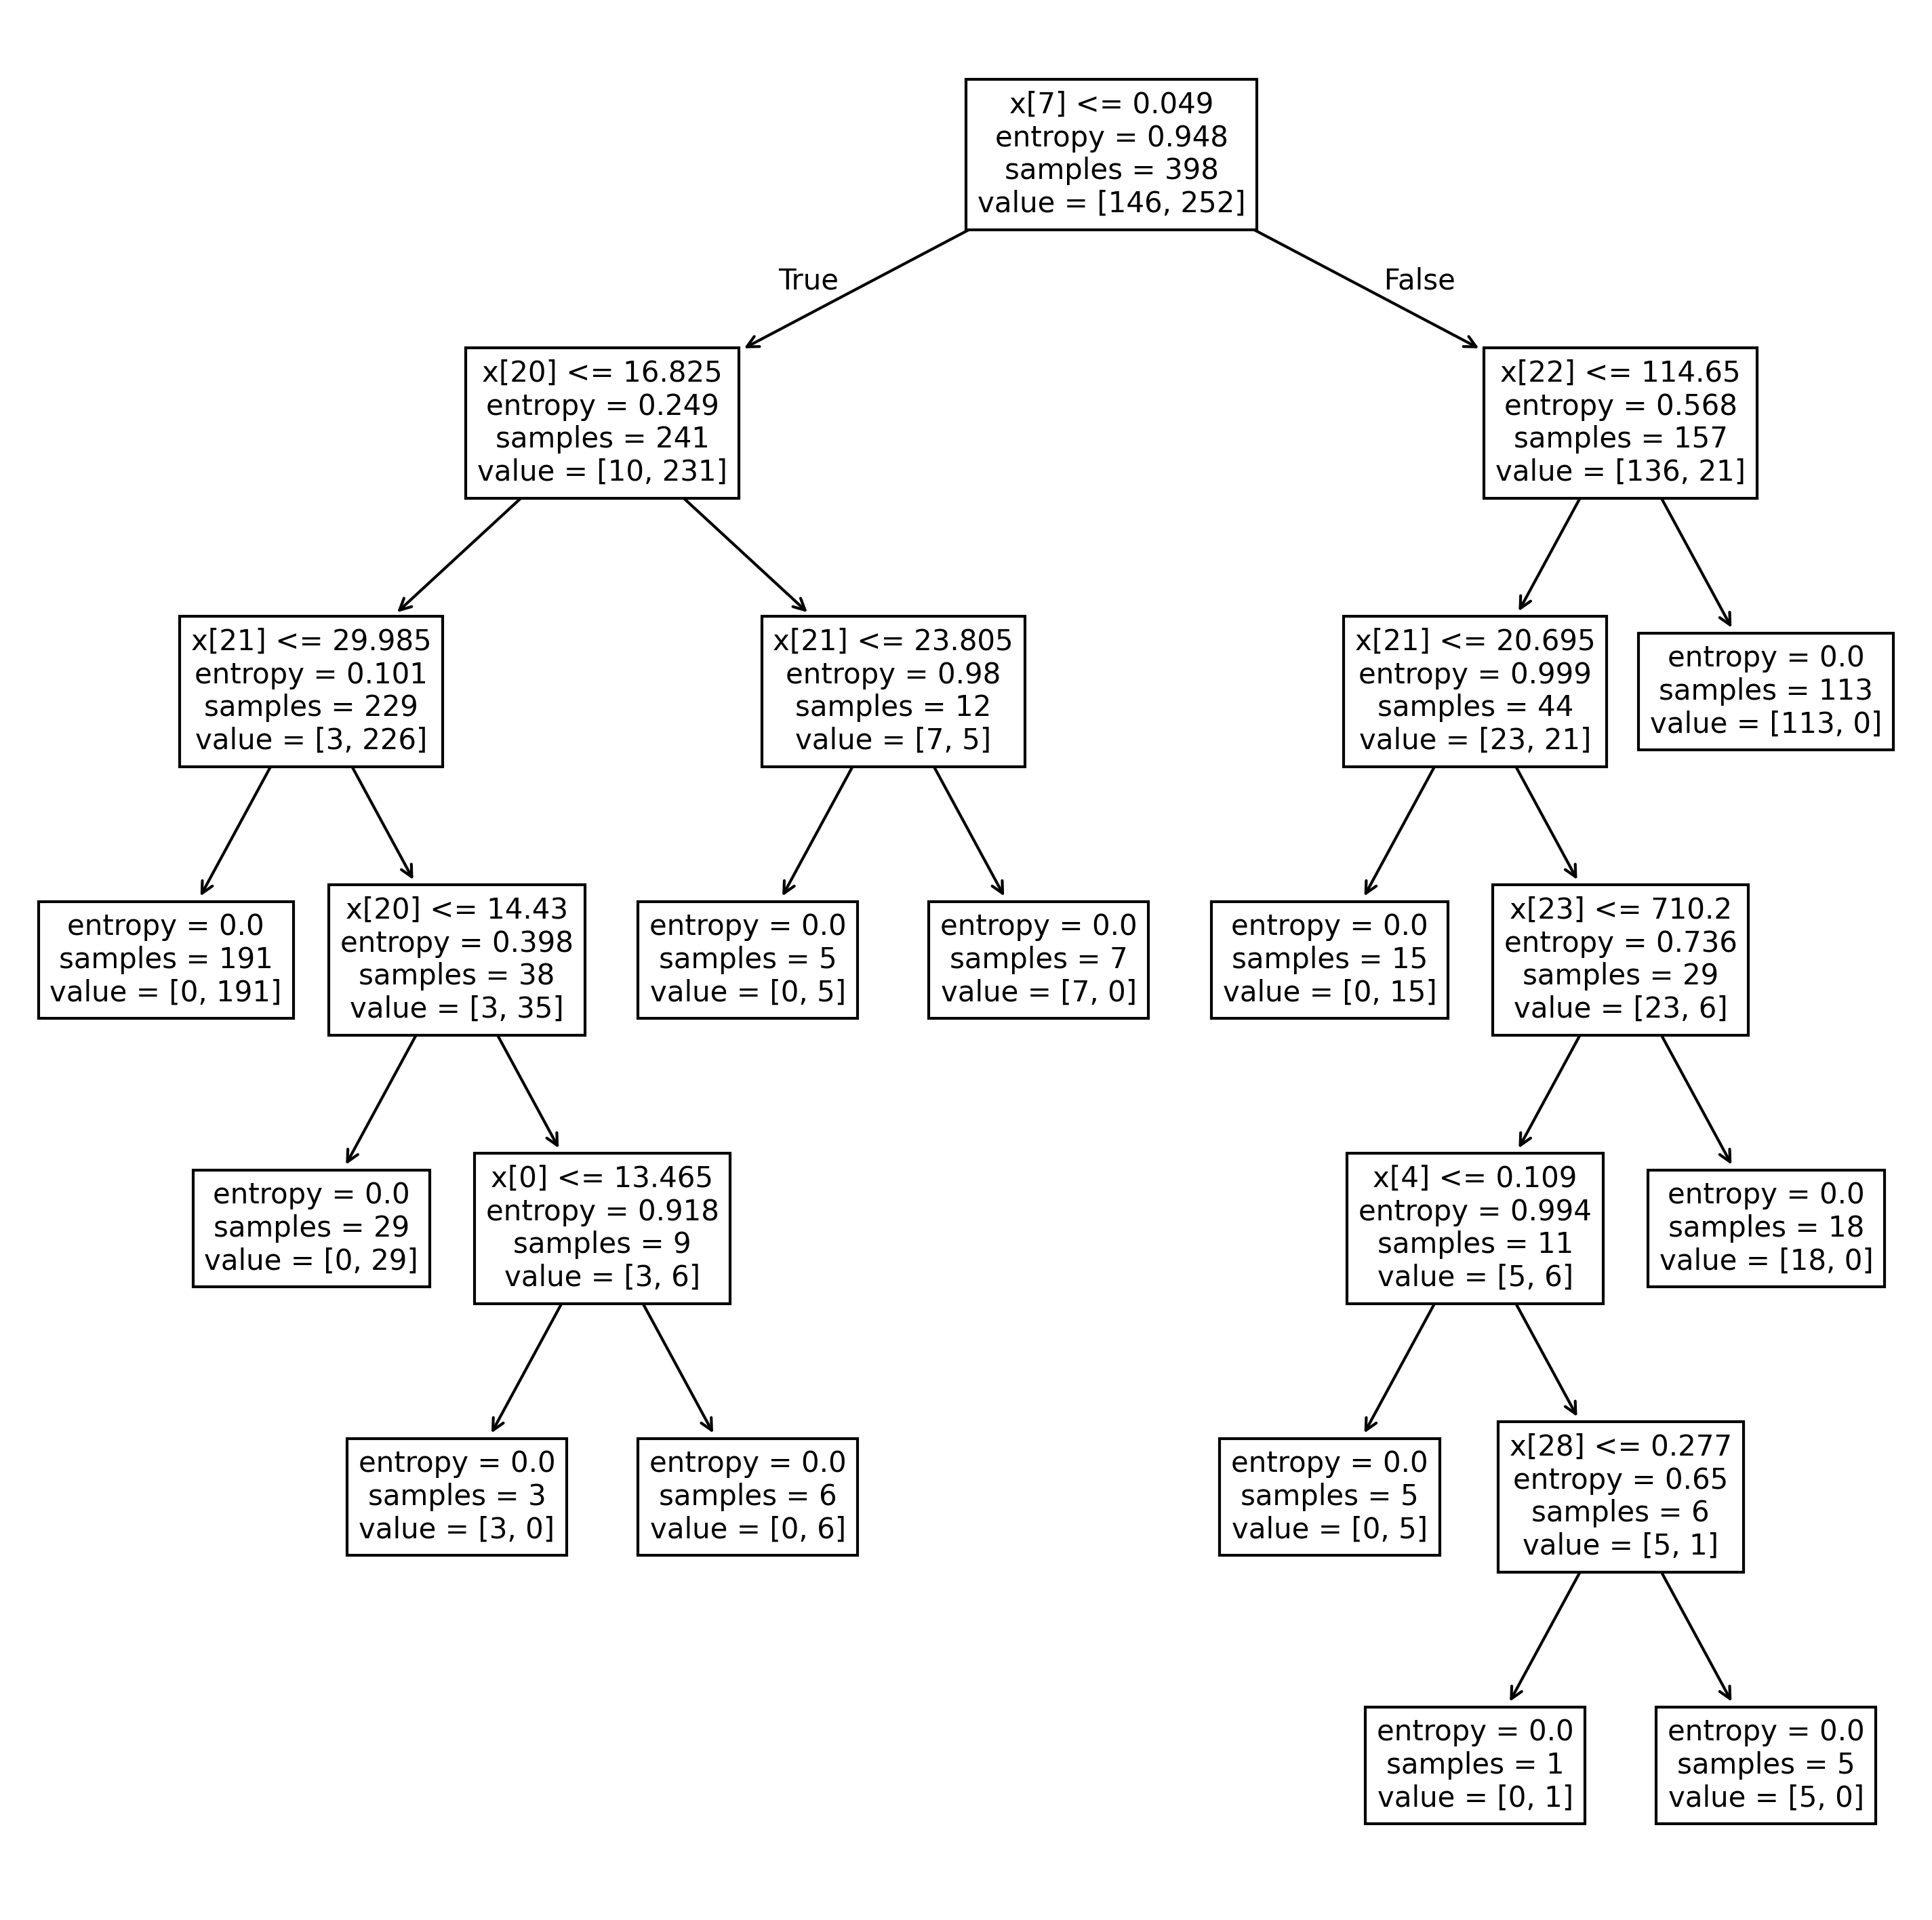

In [16]:
# plot tree
plt.figure(figsize=(12,12), dpi=300)  # set plot size (denoted in inches)

plot_tree(grid.best_estimator_)

plt.show()

# Regression

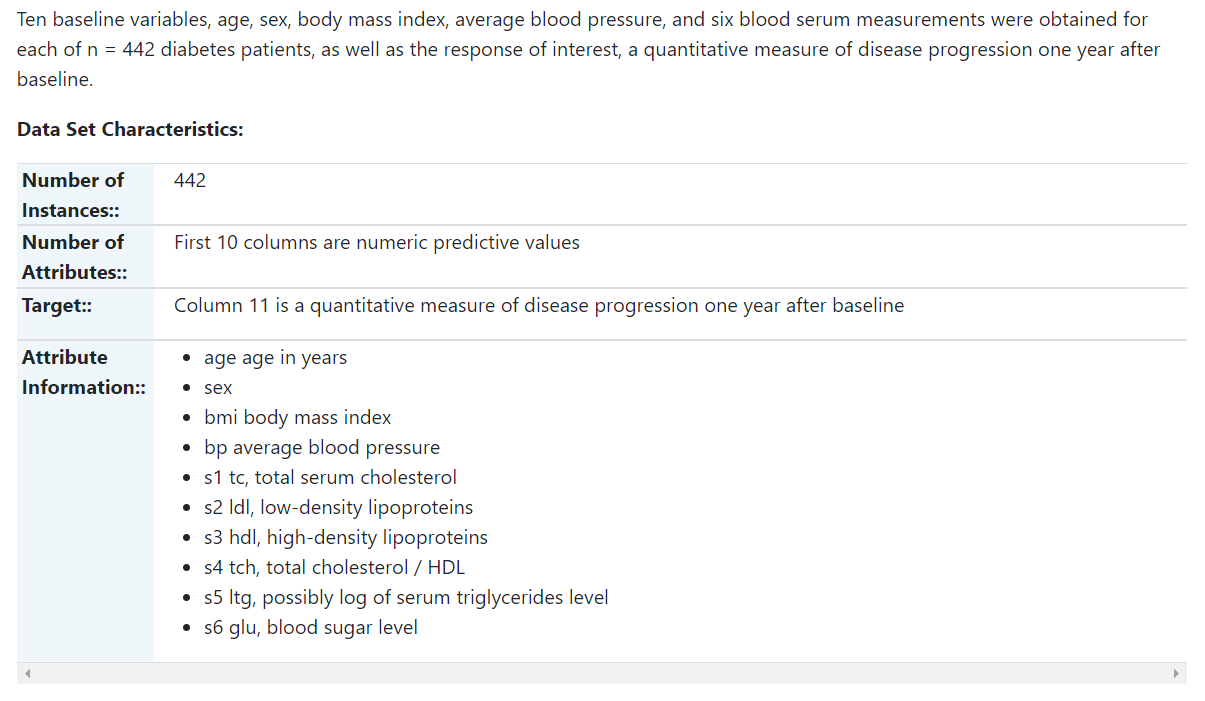

*   https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
*   https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

## Sklearn

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


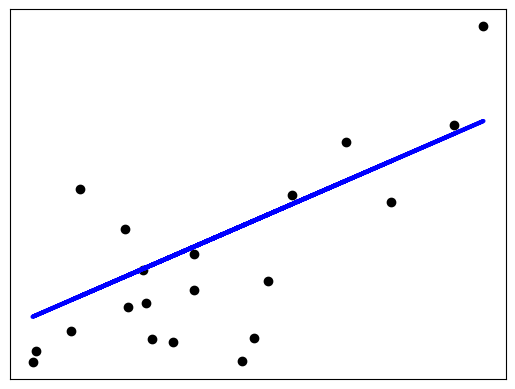

In [21]:
# Load the diabetes dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Statsmodel

In [ ]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X2 = sm.add_constant(X)

est = sm.OLS(y, X2)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           3.83e-62
Time:                        10:42:52   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0